# K Nearest Neighbors - Section Exercises

Pentru partea de exerciți o să lucrăm cu un set de date din lumea reală în care o să analizăm frecvențe radio din mare și o să facem o distincțuie între roci și mine de apă

1. Importați librăriile necesare (cele 4 librării de la începutul unui notebook cu care ne-am obișnuit)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

2. Citiți setul de date (se găsește în DATA/sonar.all-data.csv)

In [2]:
df = pd.read_csv('../data/DATA/sonar.all-data.csv')

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


3. Creați un heatmap pentru a vizualiza corelația de la date

<AxesSubplot:>

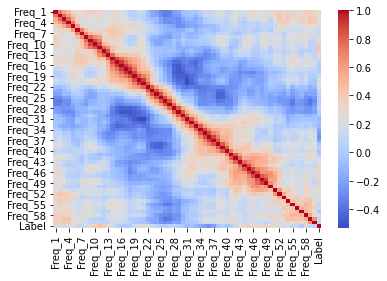

In [14]:
sns.heatmap(data=df.corr(), cmap='coolwarm')

In [6]:
df['Label'] = df['Label'].map({'R': 0, 'M' : 1})

4. train_test_split setul de date

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop('Label', axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

5. Creați un pipeline care să cuprindă partea de scalare de date și crearea unui model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
knn_model = KNeighborsClassifier()

operations = [('scaler', scaler), ('knn_model', knn_model)]

pipeline = Pipeline(steps=operations)

6. Creați un GridSearchCV și vizualizați parametrii celui mai bun model

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {'knn_model__n_neighbors': list(range(1, 30))}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

In [11]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20, 21, 22, 23,
                                                    24, 25, 26, 27, 28, 29]},
             scoring='accuracy')

7. Creați partea de validare a performanței a modelului (classification report, confusion matrix)

In [12]:
grid_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 1,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = grid_search.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1],
       [ 1, 12]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

